In [3]:
from os.path import join as pjoin
import sbmlutils
from sbmlutils.converters import xpp
from sbmlutils.report import sbmlreport
import roadrunner
from matplotlib import pyplot as plt

--------------------------------------------------------------------------------
xpp2sbml:  ./GO_F26BP.ode -> ././GO_F26BP.xml
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
././GO_F26BP.xml
valid                    : TRUE
check time (ms)          : 0.047
--------------------------------------------------------------------------------


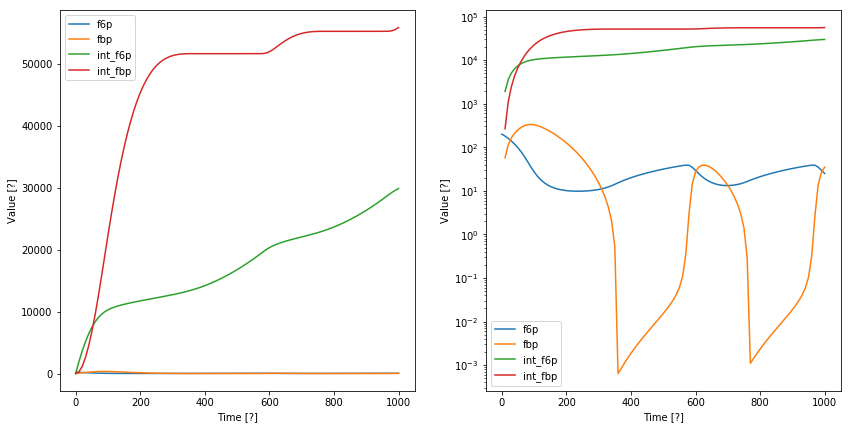

In [7]:
out_dir = "."
model_id = "GO_F26BP"
xpp_file = pjoin(out_dir, "{}.ode".format(model_id))
sbml_file = pjoin(out_dir, "./{}.xml".format(model_id))
xpp.xpp2sbml(xpp_file=xpp_file, sbml_file=sbml_file)
sbmlreport.create_sbml_report(sbml_file, out_dir=out_dir, validate=False)

# test simulation
r = roadrunner.RoadRunner(sbml_file)
s = r.simulate(start=0, end=1000, steps=1000)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))
axes = (ax1, ax2)

for ax in axes:
    for sid in r.timeCourseSelections[1:]:
        ax.plot(s['time'], s[sid], label=sid)
ax2.set_yscale('log')
for ax in axes:
    ax.set_ylabel('Value [?]')
    ax.set_xlabel('Time [?]')
    ax.legend()

fig.savefig(pjoin(out_dir, "{}.png".format(model_id)),
            dpi=300, bbox_inches='tight')
plt.show()

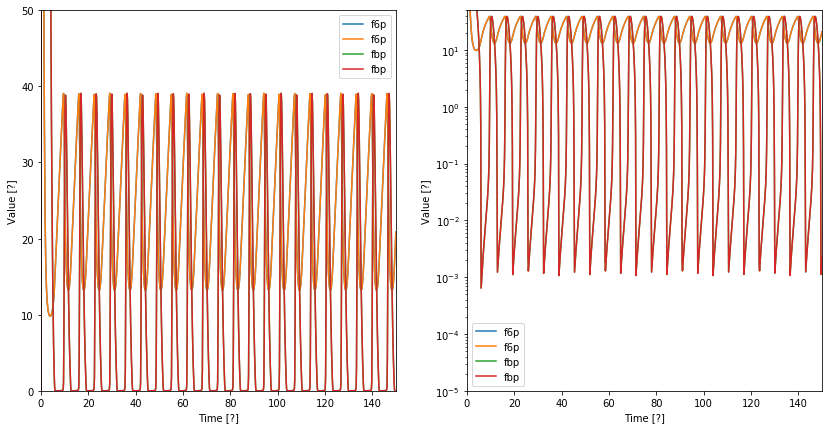

In [22]:
# simulate with intervals provided in xpp
# @ meth=cvode, toler=1.0e-10, atoler=1.0e-10, dt=0.5, total=9000, maxstor=70000
# @ bounds=10000000, xp=tmin, yp=fbp, bell=0, nmesh=100
# @ xlo=0, xhi=150, ylo=0, yhi=50

# aux tmin=t/60

import pandas as pd

# test simulation
r = roadrunner.RoadRunner(sbml_file)
r.timeCourseSelections += r.model.getGlobalParameterIds()
s = r.simulate(start=0, end=150*60, steps=1000)

s = pd.DataFrame(s, columns=s.colnames)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))
axes = (ax1, ax2)

for ax in axes:
    # plot the transformed time !
    ax.plot(s.tmin, s.f6p, label="f6p")
    ax.plot(s.tmin, s.fbp, label="fbp")
    
    # set the axes analoque to definition
    ax.set_xlim(0, 150)

ax1.set_ylim(0, 50)
ax2.set_ylim(1E-5, 50)
ax2.set_yscale('log')

for ax in axes:
    ax.set_ylabel('Value [?]')
    ax.set_xlabel('Time [?]')
    ax.legend()

fig.savefig(pjoin(out_dir, "{}_fbp.png".format(model_id)),
            dpi=300, bbox_inches='tight')
plt.show()
